In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neural_network import *

# read dataset
dataset_path = 'sonar.all-data'
# name the feature and target columns
data = pd.read_csv(dataset_path, sep=",", names=np.append(np.arange(60),['Y']))

In [2]:
# convert ir to dataframe
trainset = pd.DataFrame(data)

# transform Minerals in 0 and Rocks in 1
trainset = trainset.replace('M',0)
trainset = trainset.replace('R',1)

In [3]:
# Initialize the network:
# 60 features
# 800 neurons per hidden layer
# 2 categories (binary classification)
network = NNetwork(60, 90, 2)
# network = NNetwork(60, 512, 2)

In [4]:
# train the network
# trainset with features in the first 60 columns and the labels in the last one
# 2000 epochs
# 0.1 alpha (learning step in backpropagation)
# n_samples = 207 rows (the whole dataset)

# cost = network.train(trainset, 500, 0.01/4, trainset.shape[1])
cost = network.train(trainset, 250, 0.1, 32)

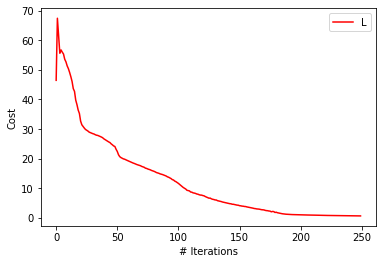

In [5]:
# Plot cost 
plt.plot(cost, 'r')
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.legend('Loss', loc='upper right')
plt.show()

In [6]:
# load saved parameters
params, cost = pickle.load(open('model', 'rb'))
[w_1, b_1, w_2, b_2, w_3, b_3] = params

# predict using the learned model
prediction = np.array([])
for i in np.arange(trainset.shape[0]):
    prediction = np.append(prediction, network.predict(trainset.iloc[i], w_1, b_1, w_2, b_2, w_3, b_3)[0])
print(prediction)

[1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
TP = TN = FP = FN = 0
for i in np.arange(len(prediction)):
    TP += trainset["Y"][i]==prediction[i] and trainset["Y"][i] == 1
    TN += trainset["Y"][i]==prediction[i] and trainset["Y"][i] == 0
    FP += not(trainset["Y"][i]==prediction[i]) and trainset["Y"][i] == 1
    FN += not(trainset["Y"][i]==prediction[i]) and trainset["Y"][i] == 0
Accuracy = (TP + TN) / float(len(prediction))
Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)

print("Accuracy", Accuracy)
print("Precision", Precision)
print("Recall", Recall)

Accuracy 0.4375
Precision 0.5154639175257731
Recall 0.4166666666666667
